# Handwritten Digit Recognition using MNIST

## 📌 Problem Statement  
Handwritten digit recognition is a classic computer vision problem where the goal is to correctly identify digits (0–9) from images written by different people. These handwritten digits can vary in size, thickness, shape, and writing style, which makes automatic recognition challenging.

In this project, we use the MNIST dataset, which contains thousands of grayscale images of handwritten digits, to build and evaluate machine learning and deep learning models that can accurately classify each image into one of the 10 digit classes (0 to 9).

---

## 🎯 Project Objectives  
The main objectives of this project are:

1. **Perform Exploratory Data Analysis (EDA):**  
   Understand the structure of the MNIST dataset, visualize sample images, and analyze the distribution of digit classes.

2. **Build Classification Models:**  
   Train multiple machine learning and deep learning models to classify handwritten digit images into one of the 10 classes (0–9).

3. **Evaluate and Compare Models:**  
   Compare the performance of different models using evaluation metrics such as accuracy and confusion matrix to identify the best-performing classifier.

4. **Select the Best Model for Production Use:**  
   Analyze trade-offs between accuracy, training time, and computational cost to recommend the most suitable model for real-world deployment.

---

## 🧠 What Are We Trying to Achieve?  
The goal is to develop an automated system that can take an image of a handwritten digit as input and correctly predict the digit it represents. This type of system is widely used in real-world applications such as:

- Optical Character Recognition (OCR)  
- Digitizing handwritten forms  
- Bank cheque processing  
- Postal code recognition  

By the end of this project, we aim to build a reliable digit recognition model and understand which algorithm works best for this type of image classification problem.


In [2]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


In [4]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

### 🔍 Understanding the Input Data

- The training data consists of 60,000 grayscale images.
- Each image has a resolution of 28×28 pixels.
- Pixel intensity values range from 0 to 255.
- The background of most images is black (pixel value 0), and the digit strokes are in white/gray.
- The labels represent digits from 0 to 9.


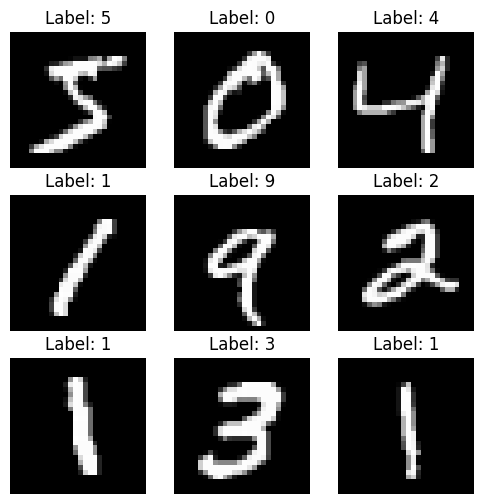

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()


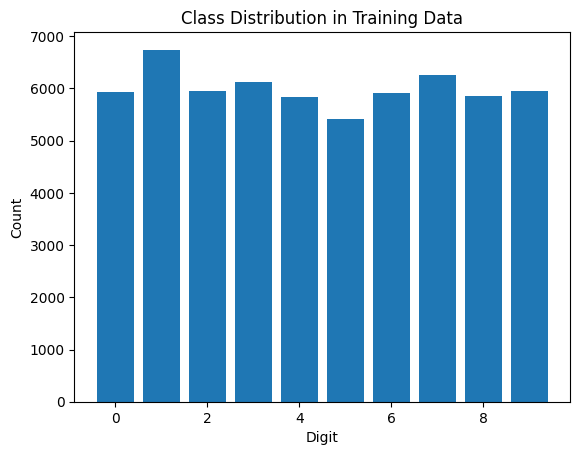

In [9]:
import numpy as np
import matplotlib.pyplot as plt

unique, counts = np.unique(y_train, return_counts=True)

plt.bar(unique, counts)
plt.xlabel("Digit")
plt.ylabel("Count")
plt.title("Class Distribution in Training Data")
plt.show()


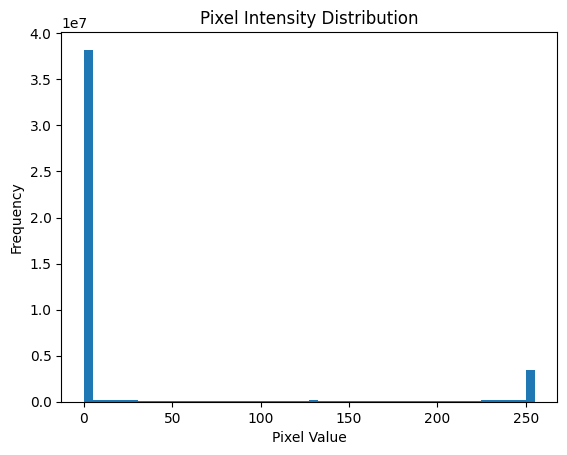

In [11]:
plt.hist(x_train.flatten(), bins=50)
plt.title("Pixel Intensity Distribution")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()


### 📊 Interpretation of Pixel Intensity Distribution

- The histogram shows a very high frequency of pixel values near 0, indicating that most pixels correspond to the black background of the images.
- Pixel values are heavily skewed toward lower intensities, which is expected since handwritten digits occupy only a small portion of each image.
- A smaller peak is observed near higher intensity values (close to 255), representing the white/bright strokes of the handwritten digits.
- The distribution confirms that the dataset is sparse in terms of foreground pixels (digit strokes) compared to background pixels.
- Since pixel values range from 0 to 255, normalization (scaling values to 0–1) is necessary to improve model training stability and convergence.


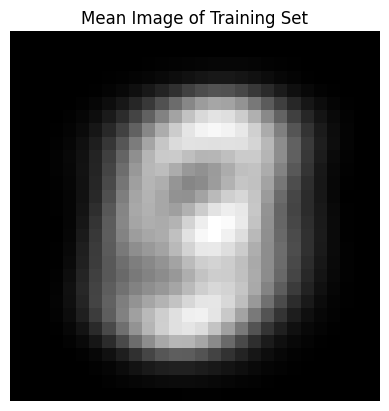

In [12]:
mean_image = x_train.mean(axis=0)

plt.imshow(mean_image, cmap='gray')
plt.title("Mean Image of Training Set")
plt.axis('off')
plt.show()


### Why Plot the Mean Image?

- The mean image is computed by taking the average of all training images at each pixel location.
- This provides a global view of where handwritten digit strokes commonly appear across the dataset.
- It helps in understanding the general spatial distribution of digits (e.g., whether digits are centered or spread out).
- The mean image highlights regions with higher pixel intensity, indicating areas where digits are frequently present.
- This analysis is useful to verify dataset consistency and alignment before training models.

### Interpretation of the Mean Image

- Brighter regions in the mean image represent pixel locations where digit strokes frequently occur.
- Darker regions indicate background areas that are rarely activated.
- The central area appears brighter, showing that most digits are centered in the images.
- The blurred appearance reflects the averaging of multiple digit shapes and writing styles.
- This confirms that MNIST images have a consistent structure, which is beneficial for training convolutional neural networks (CNNs).


The exploratory data analysis confirms that the MNIST dataset is clean, well-structured, and suitable for image classification. The dataset shows balanced class distribution, consistent image dimensions, and pixel intensity patterns that justify normalization prior to model training.


### Feature Engineering

No manual feature engineering was performed in this project. The raw pixel intensities of MNIST images were used as input features. For classical machine learning models, images were flattened into 1D vectors, while for convolutional neural networks (CNNs), the original 2D spatial structure of images was preserved. CNN models automatically learn relevant features such as edges, strokes, and shapes from raw pixel data.


# 1st Model - Logistic Regression 

In [5]:
# Normalize pixel values to [0, 1]
x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0  # normalizing so that it improves convergence 

In [6]:
#Flatten images: (N, 28, 28) -> (N, 784)
x_train_flat = x_train_norm.reshape(x_train_norm.shape[0],-1)
x_test_flat = x_test_norm.reshape(x_test_norm.shape[0],-1)

In [18]:
print(x_train_flat.shape, x_test_flat.shape) 

(60000, 784) (10000, 784)


In [19]:
from sklearn.linear_model import LogisticRegression 

lr_model = LogisticRegression(
    max_iter = 1000,
    n_jobs = 1,
    solver = 'lbfgs',
    multi_class = 'auto'
)
lr_model.fit(x_train_flat,y_train)

/opt/anaconda3/envs/mnist_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'auto'


Note: The `multi_class` parameter in LogisticRegression is deprecated in recent versions of scikit-learn. The model now defaults to multinomial (softmax) classification for multiclass problems when supported by the solver. Therefore, the parameter was removed to avoid future compatibility issues.


In [22]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = lr_model.predict(x_test_flat)

acc = accuracy_score(y_test, y_pred)
print("Test Accuracy:", acc)

print("\nClassification Report:\n", classification_report(y_test, y_pred))


Test Accuracy: 0.9258

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.90      0.91      0.91      1010
           4       0.94      0.94      0.94       982
           5       0.90      0.87      0.88       892
           6       0.94      0.95      0.95       958
           7       0.93      0.92      0.93      1028
           8       0.88      0.88      0.88       974
           9       0.91      0.92      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000



## Model Performance Interpretation (MNIST - Logistic Regression)

- Overall test accuracy is **~92.6%**, which is strong for a simple linear model on MNIST.
- The model generalizes well, indicating that normalization + flattening were sufficient for this baseline.

### Class-wise Observations

- Digits **0 and 1** have the highest performance (F1 ≈ 0.97):
  - These digits have simpler, more distinct shapes.
  - The model finds it easier to separate them in pixel space.

- Digits **2, 3, 9** show slightly lower but still strong performance (F1 ≈ 0.91):
  - These digits have overlapping stroke patterns (e.g., curves and lines).
  - Some visual ambiguity exists between these classes.

- Digits **5 and 8** have the weakest performance (F1 ≈ 0.88):
  - These digits are visually complex and vary a lot in handwriting styles.
  - Common confusions:
    - 5 ↔ 3
    - 8 ↔ 9 or 8 ↔ 0
  - This indicates limitations of a linear classifier on complex shapes.

### Precision vs Recall

- Precision and recall are well balanced across most classes:
  - This means the model is not heavily biased toward over-predicting or under-predicting any single digit.
  - Errors are mostly due to **shape similarity**, not class imbalance.

### Macro vs Weighted Averages

- Macro Avg ≈ Weighted Avg ≈ Overall Accuracy:
  - Indicates the dataset is well-balanced across classes.
  - The model performs consistently across digits, without strong bias toward any particular class.

### Key Takeaway

- Logistic Regression provides a **strong baseline** for MNIST.
- However, performance is capped due to:
  - Linear decision boundaries
  - Loss of spatial information due to flattening

### Practical Conclusion

- This result is excellent for learning:
  - Data preprocessing
  - Multiclass classification
  - Baseline benchmarking
- To push accuracy further, models that preserve spatial structure (e.g., CNNs) will perform significantly better.


In [34]:
import time

start_time = time.time()

lr_model.fit(x_train_flat, y_train)

end_time = time.time()
training_time = end_time - start_time

print(f"Training Time: {training_time:.4f} seconds")


/opt/anaconda3/envs/mnist_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Training Time: 27.8213 seconds


# Training time taken for Logistic Regression  : 33.56 seconds

# 2nd Model - SVM(RBF Kernel) 

In [27]:
from sklearn.svm import LinearSVC , SVC

In [28]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [37]:
start_time = time.time()
linear_svc_model = LinearSVC(max_iter=5000,dual = False)
linear_svc_model.fit(x_train_flat , y_train)
time_taken = time.time() - start_time

y_pred = linear_svc_model.predict(x_test_flat)
acc_score = accuracy_score(y_test,y_pred)

In [38]:
time_taken

33.56570315361023

In [39]:
acc_score

0.9184

# Training time taken for LinearSVC  : 33.56 seconds

In [40]:
start_train = time.time()
rbf_svc = SVC(kernel="rbf", C=10, gamma="scale")
rbf_svc.fit(x_train_flat, y_train)
train_time_rbf = time.time() - start_train


y_pred_rbf = rbf_svc.predict(x_test_flat)
acc_rbf = accuracy_score(y_test, y_pred_rbf)

In [41]:
train_time_rbf

141.40453600883484

In [42]:
acc_rbf

0.9837

# Training time taken for Logistic Regression  : 141.4 seconds

In [44]:
print("=== Linear SVM Classification Report ===")
print(classification_report(y_test, y_pred))

print("=== RBF SVM Classification Report ===")
print(classification_report(y_test, y_pred_rbf))

=== Linear SVM Classification Report ===
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.89      0.91      1032
           3       0.90      0.91      0.90      1010
           4       0.92      0.93      0.92       982
           5       0.89      0.86      0.88       892
           6       0.94      0.95      0.94       958
           7       0.92      0.92      0.92      1028
           8       0.88      0.87      0.87       974
           9       0.90      0.89      0.89      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

=== RBF SVM Classification Report ===
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135

In [46]:
print("Confusion Matrix - Linear SVM")
print(confusion_matrix(y_test, y_pred))

print("Confusion Matrix - RBF SVM")
print(confusion_matrix(y_test, y_pred_rbf))

Confusion Matrix - Linear SVM
[[ 962    0    2    1    1    4    5    3    1    1]
 [   0 1112    3    2    0    1    5    1   11    0]
 [  11   11  914   18   10    4   13   12   36    3]
 [   4    0   19  918    2   22    5   12   19    9]
 [   1    4    5    4  913    0    9    3    5   38]
 [   9    2    0   39   12  769   17    7   29    8]
 [   7    4    7    2    5   21  909    1    2    0]
 [   2    8   23    5    7    1    1  948    4   29]
 [  11   13    8   21   14   31    8   13  843   12]
 [   7    8    2   15   31   12    0   26   12  896]]
Confusion Matrix - RBF SVM
[[ 973    0    2    0    0    2    0    1    2    0]
 [   0 1129    2    1    0    1    0    1    1    0]
 [   5    1 1014    0    1    0    1    6    4    0]
 [   0    0    2  996    0    2    0    3    4    3]
 [   0    0    4    0  966    0    2    0    0   10]
 [   2    0    0    8    1  873    3    0    3    2]
 [   5    2    0    0    2    3  945    0    1    0]
 [   0    3    9    2    1    0    0 1007

## Interpretation of Second Model – SVM (RBF Kernel)

### 1. Overall Accuracy

The RBF SVM achieved an accuracy of approximately 98%, which is a significant improvement compared to:
- Logistic Regression (~92–93%)
- Linear SVM (~91–92%)

This indicates that the dataset is not perfectly linearly separable and benefits from non-linear decision boundaries.

---

### 2. Why RBF Performs Better

The RBF (Radial Basis Function) kernel enables the SVM to:
- Create non-linear (curved) decision boundaries
- Map input features into a higher-dimensional space
- Better separate complex digit patterns

This is especially helpful for digits that are visually similar, such as:
- 3 and 5
- 4 and 9
- 8 and 0

The reduction in confusion among these digits explains the higher accuracy.

---

### 3. Precision, Recall and F1-Score

The classification report shows:
- High precision and recall across almost all digit classes
- Balanced F1-scores (close to 0.98)
- No major class imbalance issues

This indicates that the model:
- Does not heavily over-predict any specific digit
- Maintains consistent performance across all classes

---

### 4. Training Time Analysis

The RBF SVM required significantly more training time compared to:
- Logistic Regression
- Linear SVM

This is because RBF SVM:
- Computes similarity between many data points
- Maintains support vectors for classification
- Has higher computational complexity

Thus, it achieves higher accuracy at the cost of increased computation.

---

### Conclusion

The RBF SVM demonstrates strong non-linear classification capability and significantly improves accuracy on MNIST.

However, the computational cost is higher, highlighting the trade-off between:
- Model complexity and performance
- Speed and accuracy

This result motivates the use of deep learning models (CNNs), which preserve spatial structure and can achieve even higher performance efficiently.


# 3rd Model - CNN

In [9]:
import tensorflow as tf
import keras

In [53]:
model = keras.Sequential(
    [
        keras.layers.Dense(10,input_shape = (784,),activation = 'sigmoid')
    ]
)
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

start_time = time.time()
model.fit(x_train_flat, y_train,epochs = 5 )
training_time = time.time() - start_time 
print('Training Time for CNN without hidden layers : ',training_time)

Epoch 1/5
  26/1875 [..............................] - ETA: 7s - loss: 2.0357 - accuracy: 0.3209

2026-02-15 23:50:56.795252: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 8s 4ms/step - loss: 0.4702 - accuracy: 0.8766
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3043 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2831 - accuracy: 0.9209
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2732 - accuracy: 0.9234
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2671 - accuracy: 0.9257
Training Time for CNN without hidden layers :  37.28951334953308


# Training Time for CNN wihout Hidden layers is 37.28

In [59]:
model.evaluate(x_test_flat , y_test )

313/313 [==============================] - 1s 4ms/step - loss: 0.2690 - accuracy: 0.9250


[0.26895931363105774, 0.925000011920929]

In [60]:
import warnings 
from warnings import filterwarnings 
filterwarnings('ignore')

In [61]:
y_predicted = model.predict(x_test_flat)

313/313 [==============================] - 0s 1ms/step


In [62]:
import numpy as np
y_predicted_labels = [np.argmax(i) for i in y_predicted ] # because the predicted gives the similarity we just getting the max_similiary score index for each predictions.

In [63]:
cm = tf.math.confusion_matrix(labels = y_test , predictions = y_predicted_labels)

In [64]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    2,    2,    0,    5,    6,    2,    1,    1],
       [   0, 1114,    3,    2,    0,    1,    4,    2,    9,    0],
       [   4,    9,  932,   14,    7,    2,   13,   12,   35,    4],
       [   4,    0,   24,  915,    0,   17,    3,   15,   23,    9],
       [   1,    1,    4,    1,  908,    0,   13,    6,   10,   38],
       [  11,    3,    6,   40,   10,  747,   21,   10,   36,    8],
       [  10,    3,    6,    1,    7,    7,  920,    2,    2,    0],
       [   1,    6,   24,    2,    5,    0,    0,  965,    1,   24],
       [   7,    7,    8,   18,    8,   18,   11,   13,  874,   10],
       [  11,    7,    1,   10,   22,    4,    0,   35,    5,  914]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

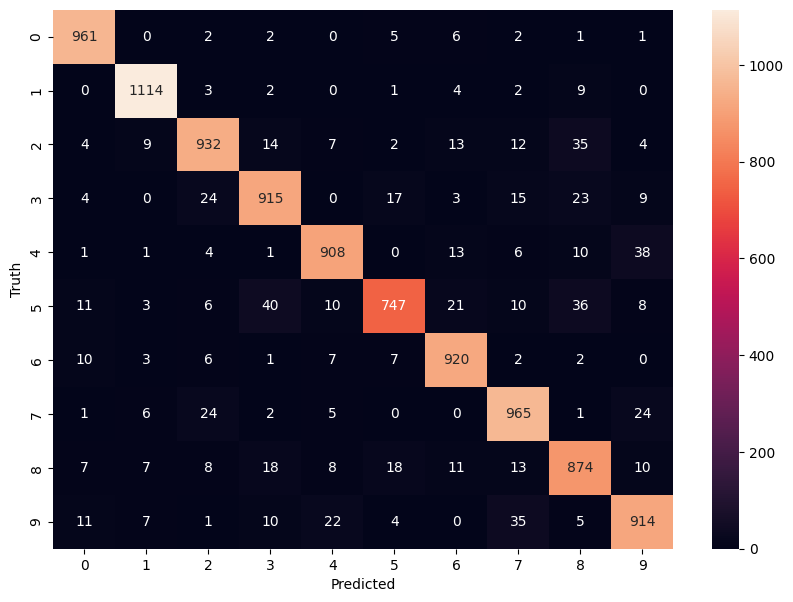

In [65]:
import seaborn as sn 
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot = True ,fmt = 'd')
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [11]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import time

# 1️⃣ Load Dataset (Fresh)
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# 2️⃣ Normalize (VERY IMPORTANT)
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# 3️⃣ Reshape for CNN (Add channel dimension)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

print("Training shape:", X_train.shape)
print("Test shape:", X_test.shape)

# 4️⃣ Build CNN Model
model = keras.Sequential([
    
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    
    layers.Dense(10, activation='softmax')
])

# 5️⃣ Compile
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# 6️⃣ Train
start_time = time.time()

history = model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.1
)

training_time = time.time() - start_time
print("Training Time:", training_time)

# 7️⃣ Evaluate on Test Data
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print("Test Accuracy:", test_accuracy)


Training shape: (60000, 28, 28, 1)
Test shape: (10000, 28, 28, 1)
Epoch 1/10


2026-02-16 01:41:33.410976: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


422/422 [==============================] - ETA: 0s - loss: 0.3058 - accuracy: 0.9047

2026-02-16 01:41:39.398996: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


422/422 [==============================] - 7s 15ms/step - loss: 0.3058 - accuracy: 0.9047 - val_loss: 0.0731 - val_accuracy: 0.9797
Epoch 2/10
422/422 [==============================] - 6s 14ms/step - loss: 0.1395 - accuracy: 0.9625 - val_loss: 0.0701 - val_accuracy: 0.9828
Epoch 3/10
422/422 [==============================] - 6s 15ms/step - loss: 0.1350 - accuracy: 0.9687 - val_loss: 0.0727 - val_accuracy: 0.9850
Epoch 4/10
422/422 [==============================] - 6s 14ms/step - loss: 0.1615 - accuracy: 0.9694 - val_loss: 0.1022 - val_accuracy: 0.9837
Epoch 5/10
422/422 [==============================] - 6s 14ms/step - loss: 0.2184 - accuracy: 0.9701 - val_loss: 0.1051 - val_accuracy: 0.9878
Epoch 6/10
422/422 [==============================] - 6s 14ms/step - loss: 0.2716 - accuracy: 0.9710 - val_loss: 0.2118 - val_accuracy: 0.9827
Epoch 7/10
422/422 [==============================] - 6s 14ms/step - loss: 0.3496 - accuracy: 0.9705 - val_loss: 0.1932 - val_accuracy: 0.9877
Epoch 8/10

In [12]:
y_predicted = model.predict(X_test)

 49/313 [===>..........................] - ETA: 0s

2026-02-16 01:43:03.467942: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 3ms/step


In [13]:
training_time 

60.26338195800781

# Training Time for CNN with multiple Layers : 60.26

Text(95.72222222222221, 0.5, 'Truth')

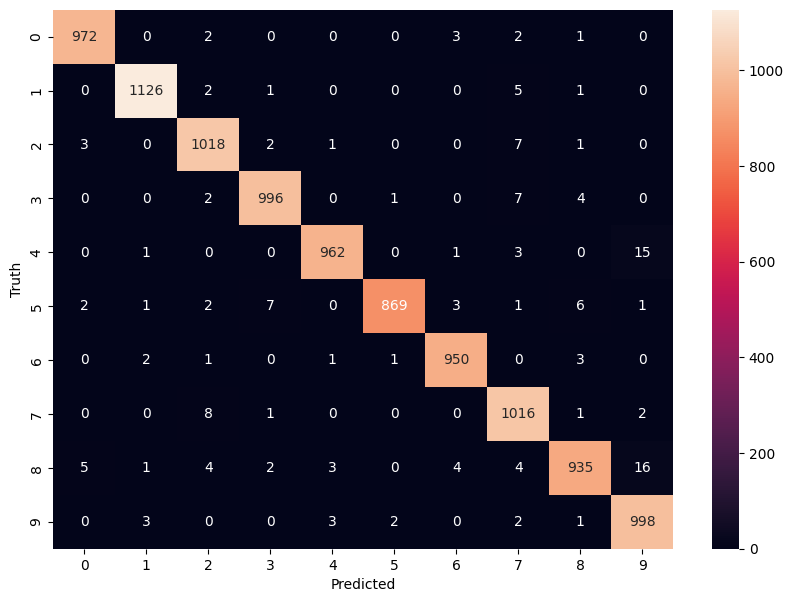

In [15]:
import numpy as np
y_predicted_labels = [np.argmax(i) for i in y_predicted ]
cm = tf.math.confusion_matrix(labels = y_test , predictions = y_predicted_labels)

import matplotlib.pyplot as plt
import seaborn as sn 
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot = True ,fmt = 'd')
plt.xlabel("Predicted")
plt.ylabel("Truth")